In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# %load neuralnet_backprop.py
import numpy as np

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    y = exp_a / np.sum(exp_a)
    return y

def softmax_batch(A):
    return np.apply_along_axis(arr=A, axis=1, func1d=softmax)

def cross_entroy_error(y_pred, y):
    """분류용 손실함수"""
    delta = 1e-7 # 아주 작은 값.     
    return -np.sum(y * np.log(y_pred + delta))

def cross_entropy_error_batch(y_pred, y):
    batch_size = len(y)
    cse = cross_entroy_error(y_pred, y) / batch_size
    return cse


class ReLu:
    def __init__(self):
        self.mask = None
        
    def forward(self, x):
        self.mask = x > 0
        return np.where(self.mask, x, 0)
    
    def backward(self, dout):
        return np.where(self.mask, 1, 0)


class Sigmoid:
    def __init__(self):
        self.out = None
        
    def forward(self, x):
        self.out = 1 / (1 + np.exp(-x))
        return self.out
    
    def backward(self, dout):
        dx = dout * self.out * (1 - self.out)
        return dx


class Affine:
    def __init__(self, 입력수, 출력수):
        self.W = np.random.randn(입력수, 출력수)
        self.b = np.random.randn(출력수)
        self.X = None
        self.dW = None
        self.db = None
        
    def forward(self, X):
        self.X = X
        z = np.dot(X, self.W) + self.b
        return z
    
    def backward(self, dout):
        dX = np.dot(dout, self.W.T)
        self.dW = np.dot(self.X.T, dout)
        self.db = np.sum(dout, axis=0)
        return dX


class SoftmaxCrossEntropy:
    def __init__(self):
        self.Y = None
        self.Y_pred = None
        
    def forward(self, X, Y):
        self.Y = Y
        self.Y_pred = softmax_batch(X)
        loss = cross_entropy_error_batch(self.Y_pred, self.Y)
        return loss
    
    def backward(self, dout=1):
        batch_size = len(self.Y)
        dX = (self.Y_pred - self.Y) / batch_size
        return dX


class FeedForwadNet:
    def __init__(self):
        self.layers = []
        
    def add(self, layer):
        self.layers.append(layer)
        
    def predict(self, X):
        layer_output = X
        for layer in self.layers[:-1]:
            layer_output = layer.forward(layer_output)            
        return layer_output
    
    def compute_loss(self, X, Y):
        Y_pred = self.predict(X)
        loss = self.layers[-1].forward(Y_pred, Y)
        return loss
    
    def fit(self, X, y, 배치크기, 학습횟수, 학습률):
        loss_history = []
        for i in range(학습횟수):
            # 1. 미니배치
            샘플수 = len(X)
            배치색인 = np.random.choice(샘플수, 배치크기)
            X_batch = X[배치색인]
            y_batch = y[배치색인]
            # 2. 기울기 산출
            #  1) 순전파
            self.compute_loss(X_batch, y_batch)
            #  2) 역전파
            dout = 1
            for layer in reversed(self.layers):
                dout = layer.backward(dout)
            # 3. 갱신
            for layer in self.layers:
                if isinstance(layer, Affine):
                    layer.W -= layer.dW * 학습률
                    layer.b -= layer.db * 학습률
            
            # 손실 확인
            loss = self.compute_loss(X_batch, y_batch)
            loss_history.append(loss)
            print('[학습 {}] Loss: {}'.format(i+1, loss))
        
        return loss_history

In [3]:
from deepy.dataset import mnist

In [4]:
(X_train, Y_train), (X_test, Y_test) = \
    mnist.load_mnist(flatten=True, normalize=True, 
                     one_hot_label=True)

In [5]:
model = FeedForwadNet()
model.add(Affine(784, 50))
model.add(Sigmoid())
model.add(Affine(50, 100))
model.add(Sigmoid())
model.add(Affine(100, 10))
model.add(SoftmaxCrossEntropy())

In [6]:
loss_history = model.fit(X_train, Y_train, 
                         배치크기=100, 학습횟수=600*10,
                         학습률=0.01)

[학습 1] Loss: 7.3538629866503
[학습 2] Loss: 6.478018785314634
[학습 3] Loss: 6.2001104801063684
[학습 4] Loss: 6.7245169474241075
[학습 5] Loss: 6.085240713806126
[학습 6] Loss: 6.434449759427757
[학습 7] Loss: 6.688489615482231
[학습 8] Loss: 7.697694085291639
[학습 9] Loss: 5.926272879976865
[학습 10] Loss: 5.845396627366892
[학습 11] Loss: 6.499744925216391
[학습 12] Loss: 5.9523532793543765
[학습 13] Loss: 6.123332432468417
[학습 14] Loss: 5.196958847940855
[학습 15] Loss: 5.246512673443999
[학습 16] Loss: 6.217034278463884
[학습 17] Loss: 5.706453306679389
[학습 18] Loss: 5.609612738568266
[학습 19] Loss: 6.026331260990281
[학습 20] Loss: 5.259047978547528
[학습 21] Loss: 5.194316668666122
[학습 22] Loss: 5.622107769938461
[학습 23] Loss: 5.202883168471692
[학습 24] Loss: 5.311122960914872
[학습 25] Loss: 5.201595661585674
[학습 26] Loss: 4.6230584779341655
[학습 27] Loss: 4.682271865221903
[학습 28] Loss: 5.436516049965041
[학습 29] Loss: 4.827969310591617
[학습 30] Loss: 5.55611003662809
[학습 31] Loss: 4.619391928267166
[학습 32] Loss: 5.

[학습 250] Loss: 3.165110599724535
[학습 251] Loss: 3.037981325499126
[학습 252] Loss: 3.3474251140956484
[학습 253] Loss: 3.029829927558538
[학습 254] Loss: 2.9709247861604315
[학습 255] Loss: 2.8998263154722115
[학습 256] Loss: 2.988434208879537
[학습 257] Loss: 3.1457560362873886
[학습 258] Loss: 3.1441571724548907
[학습 259] Loss: 3.2332034466447443
[학습 260] Loss: 3.246041710733315
[학습 261] Loss: 3.118115888111704
[학습 262] Loss: 2.9894708453118346
[학습 263] Loss: 2.8480610370078336
[학습 264] Loss: 3.478060796781431
[학습 265] Loss: 3.0201885512753175
[학습 266] Loss: 3.155192273958534
[학습 267] Loss: 3.345152667234785
[학습 268] Loss: 3.2320333488891886
[학습 269] Loss: 2.9903982274809873
[학습 270] Loss: 2.9259484002399265
[학습 271] Loss: 3.192211150367912
[학습 272] Loss: 3.417636251675998
[학습 273] Loss: 2.8815375606743108
[학습 274] Loss: 3.219172921163891
[학습 275] Loss: 2.9514239012299823
[학습 276] Loss: 3.1490496989762162
[학습 277] Loss: 2.7833923354812216
[학습 278] Loss: 3.327142061051072
[학습 279] Loss: 3.3148242040

[학습 505] Loss: 2.4016637814989266
[학습 506] Loss: 2.601148194365901
[학습 507] Loss: 2.419651808780573
[학습 508] Loss: 2.7748766476206437
[학습 509] Loss: 2.709284177639374
[학습 510] Loss: 2.5265293299100318
[학습 511] Loss: 2.7145201744202176
[학습 512] Loss: 2.4415058875302464
[학습 513] Loss: 2.593321740476812
[학습 514] Loss: 2.3982916978374504
[학습 515] Loss: 2.5824727322944443
[학습 516] Loss: 2.570391007311298
[학습 517] Loss: 2.6331137369453774
[학습 518] Loss: 2.127788705931045
[학습 519] Loss: 2.2229685934931256
[학습 520] Loss: 2.089201479150416
[학습 521] Loss: 2.647901948840473
[학습 522] Loss: 2.540754790782426
[학습 523] Loss: 2.164305915370119
[학습 524] Loss: 2.4133734785342718
[학습 525] Loss: 2.5231639416995284
[학습 526] Loss: 2.6606579728467192
[학습 527] Loss: 2.43613956505586
[학습 528] Loss: 2.5349821359489115
[학습 529] Loss: 2.2651140153219074
[학습 530] Loss: 2.440018698953343
[학습 531] Loss: 2.663919714194189
[학습 532] Loss: 2.272764525251626
[학습 533] Loss: 2.449290646928921
[학습 534] Loss: 2.6001284252128

[학습 765] Loss: 2.216649600474337
[학습 766] Loss: 2.374967988574169
[학습 767] Loss: 2.199720109750437
[학습 768] Loss: 1.912679210059553
[학습 769] Loss: 2.112032867675597
[학습 770] Loss: 2.052239710338158
[학습 771] Loss: 2.134688111101914
[학습 772] Loss: 1.971744796900004
[학습 773] Loss: 1.8183002186474362
[학습 774] Loss: 2.0404937281473656
[학습 775] Loss: 2.1407025654694305
[학습 776] Loss: 2.085163550317178
[학습 777] Loss: 2.2017734431708584
[학습 778] Loss: 2.248821509101655
[학습 779] Loss: 2.497836351636845
[학습 780] Loss: 2.0582778504170203
[학습 781] Loss: 2.1782565641146228
[학습 782] Loss: 2.161183254866952
[학습 783] Loss: 2.143260661158603
[학습 784] Loss: 2.138191171812258
[학습 785] Loss: 2.4218818725402524
[학습 786] Loss: 2.2323292923689735
[학습 787] Loss: 2.284376893725425
[학습 788] Loss: 1.9755902054092354
[학습 789] Loss: 2.4363485300035466
[학습 790] Loss: 2.101119563795958
[학습 791] Loss: 2.1351125066508048
[학습 792] Loss: 2.203812391044458
[학습 793] Loss: 2.2219845625974917
[학습 794] Loss: 2.18218495781973

[학습 1030] Loss: 2.2363692986476598
[학습 1031] Loss: 1.6210393586432383
[학습 1032] Loss: 2.0516042257773486
[학습 1033] Loss: 2.060358640970409
[학습 1034] Loss: 1.7808657835460366
[학습 1035] Loss: 1.9797796998009547
[학습 1036] Loss: 1.6723816939753136
[학습 1037] Loss: 1.8644416505882335
[학습 1038] Loss: 1.840281765086815
[학습 1039] Loss: 2.07605432444554
[학습 1040] Loss: 1.6592486186859279
[학습 1041] Loss: 1.99322388486961
[학습 1042] Loss: 1.9519998418730484
[학습 1043] Loss: 1.8691754431100813
[학습 1044] Loss: 1.9070091317952562
[학습 1045] Loss: 2.1329151559741866
[학습 1046] Loss: 2.174986149295053
[학습 1047] Loss: 1.674463584323924
[학습 1048] Loss: 1.914366113797675
[학습 1049] Loss: 2.126995294410279
[학습 1050] Loss: 2.0664211962295203
[학습 1051] Loss: 1.9152347543267052
[학습 1052] Loss: 2.0350283511209244
[학습 1053] Loss: 1.9282074748608795
[학습 1054] Loss: 1.7984023921463943
[학습 1055] Loss: 1.925393157273851
[학습 1056] Loss: 2.052108472075072
[학습 1057] Loss: 1.9943838339871531
[학습 1058] Loss: 1.78711485594116

[학습 1283] Loss: 1.9640792514997145
[학습 1284] Loss: 1.966350780150416
[학습 1285] Loss: 1.718898823274326
[학습 1286] Loss: 1.6946279027104945
[학습 1287] Loss: 1.762448210395605
[학습 1288] Loss: 1.5630036912964338
[학습 1289] Loss: 1.8286672063952194
[학습 1290] Loss: 1.9405574700443577
[학습 1291] Loss: 1.902884097048605
[학습 1292] Loss: 2.039481080258623
[학습 1293] Loss: 1.864973401255325
[학습 1294] Loss: 1.929016054433862
[학습 1295] Loss: 1.7527358487603215
[학습 1296] Loss: 1.8638818476432744
[학습 1297] Loss: 1.820546198711417
[학습 1298] Loss: 1.7345338922601121
[학습 1299] Loss: 1.5658730702583343
[학습 1300] Loss: 1.7946382014030728
[학습 1301] Loss: 1.6360090553387723
[학습 1302] Loss: 1.6221112357341487
[학습 1303] Loss: 1.777667892202719
[학습 1304] Loss: 1.7704660861294657
[학습 1305] Loss: 1.7745543617901118
[학습 1306] Loss: 1.6910800390073246
[학습 1307] Loss: 1.7875043554122738
[학습 1308] Loss: 1.5249984661328981
[학습 1309] Loss: 1.6282979103586854
[학습 1310] Loss: 1.7769259703376494
[학습 1311] Loss: 1.78841725366

[학습 1522] Loss: 1.7784546985433423
[학습 1523] Loss: 1.7276736923353375
[학습 1524] Loss: 1.5405863268549138
[학습 1525] Loss: 1.8899745265861938
[학습 1526] Loss: 1.647657646355742
[학습 1527] Loss: 1.5195186680718762
[학습 1528] Loss: 1.8139487880965772
[학습 1529] Loss: 1.7005892022158742
[학습 1530] Loss: 1.4119045679547986
[학습 1531] Loss: 1.474380629544481
[학습 1532] Loss: 1.508134277041693
[학습 1533] Loss: 1.589160356060196
[학습 1534] Loss: 1.5452995892977683
[학습 1535] Loss: 1.7556895808827315
[학습 1536] Loss: 1.4942801828140881
[학습 1537] Loss: 1.7105757569298103
[학습 1538] Loss: 1.6828127775434154
[학습 1539] Loss: 1.3400774686989516
[학습 1540] Loss: 1.362469370557668
[학습 1541] Loss: 1.7304771777163848
[학습 1542] Loss: 1.619180971817942
[학습 1543] Loss: 1.7901078882899861
[학습 1544] Loss: 1.6393016060410937
[학습 1545] Loss: 1.5591578784738906
[학습 1546] Loss: 1.4528825743636042
[학습 1547] Loss: 1.6159836553039622
[학습 1548] Loss: 1.8285591335698899
[학습 1549] Loss: 1.7181411036925311
[학습 1550] Loss: 1.87803738

[학습 1767] Loss: 1.5421575001888297
[학습 1768] Loss: 1.6120869501052055
[학습 1769] Loss: 1.5830167926275884
[학습 1770] Loss: 1.598886941609925
[학습 1771] Loss: 1.3122090195978182
[학습 1772] Loss: 1.7367889480139886
[학습 1773] Loss: 1.5341818853353748
[학습 1774] Loss: 1.4684056037832938
[학습 1775] Loss: 1.5439808119677831
[학습 1776] Loss: 1.8519773113680333
[학습 1777] Loss: 1.572249769501881
[학습 1778] Loss: 1.678758367034194
[학습 1779] Loss: 1.6961309117657395
[학습 1780] Loss: 1.6507633859533257
[학습 1781] Loss: 1.5911216031906597
[학습 1782] Loss: 1.4036030306778429
[학습 1783] Loss: 1.5362411519159658
[학습 1784] Loss: 1.4269113374602314
[학습 1785] Loss: 1.6643372319215575
[학습 1786] Loss: 1.5970498996246096
[학습 1787] Loss: 1.422104306080327
[학습 1788] Loss: 1.4830722948571917
[학습 1789] Loss: 1.377130453945292
[학습 1790] Loss: 1.3446518068508917
[학습 1791] Loss: 1.4333636997333403
[학습 1792] Loss: 1.7846988509968267
[학습 1793] Loss: 1.4750691766615733
[학습 1794] Loss: 1.7739914874318348
[학습 1795] Loss: 1.3974613

[학습 2003] Loss: 1.4479661109001882
[학습 2004] Loss: 1.5108378514257652
[학습 2005] Loss: 1.3026945145585456
[학습 2006] Loss: 1.2375329500469316
[학습 2007] Loss: 1.5271641284698894
[학습 2008] Loss: 1.6715531942136197
[학습 2009] Loss: 1.62984654754417
[학습 2010] Loss: 1.2759898333350639
[학습 2011] Loss: 1.2912032085282066
[학습 2012] Loss: 1.467293581901904
[학습 2013] Loss: 1.2751430813472018
[학습 2014] Loss: 1.614960388950296
[학습 2015] Loss: 1.4827791631498672
[학습 2016] Loss: 1.515048344218392
[학습 2017] Loss: 1.44550607652738
[학습 2018] Loss: 1.4907818022567556
[학습 2019] Loss: 1.4110729076270192
[학습 2020] Loss: 1.5244760657090097
[학습 2021] Loss: 1.285463214323389
[학습 2022] Loss: 1.4035855391073793
[학습 2023] Loss: 1.6348814270905294
[학습 2024] Loss: 1.7215787212095994
[학습 2025] Loss: 1.5791458093114716
[학습 2026] Loss: 1.5181580628819162
[학습 2027] Loss: 1.3418586428027488
[학습 2028] Loss: 1.4638443749564096
[학습 2029] Loss: 1.316408499898518
[학습 2030] Loss: 1.4365504509955076
[학습 2031] Loss: 1.43733402334

[학습 2252] Loss: 1.414512425004106
[학습 2253] Loss: 1.300402904661608
[학습 2254] Loss: 1.5395109424168851
[학습 2255] Loss: 1.7688287260905273
[학습 2256] Loss: 1.469031320040844
[학습 2257] Loss: 1.2933325037255243
[학습 2258] Loss: 1.4849824417208344
[학습 2259] Loss: 1.4961732204582174
[학습 2260] Loss: 1.2989090973864228
[학습 2261] Loss: 1.4138672676632087
[학습 2262] Loss: 1.307125031739079
[학습 2263] Loss: 1.461310733117153
[학습 2264] Loss: 1.380684441400772
[학습 2265] Loss: 1.1161103342380037
[학습 2266] Loss: 1.4307951189893275
[학습 2267] Loss: 1.4393276589471733
[학습 2268] Loss: 1.364586716861326
[학습 2269] Loss: 1.2886861837091714
[학습 2270] Loss: 1.2586452169875468
[학습 2271] Loss: 1.422674301837285
[학습 2272] Loss: 1.5300271535214174
[학습 2273] Loss: 1.2881467227387304
[학습 2274] Loss: 1.4445586563468458
[학습 2275] Loss: 1.2758352573448042
[학습 2276] Loss: 1.4470175901459488
[학습 2277] Loss: 1.5575916844089626
[학습 2278] Loss: 1.46833876773345
[학습 2279] Loss: 1.3591429503468322
[학습 2280] Loss: 1.639217808978

[학습 2504] Loss: 1.2755493848837984
[학습 2505] Loss: 1.470598088642241
[학습 2506] Loss: 1.3007882486674964
[학습 2507] Loss: 1.3225471295165983
[학습 2508] Loss: 1.3882931522015298
[학습 2509] Loss: 1.3481722802056424
[학습 2510] Loss: 1.49528872653947
[학습 2511] Loss: 1.1773732090833524
[학습 2512] Loss: 1.5177032522906426
[학습 2513] Loss: 1.568940595737439
[학습 2514] Loss: 1.399063807732378
[학습 2515] Loss: 1.3597553382936334
[학습 2516] Loss: 1.3902356909001492
[학습 2517] Loss: 1.4048789100142303
[학습 2518] Loss: 1.228562519896294
[학습 2519] Loss: 1.3058233592397164
[학습 2520] Loss: 1.3208167572996252
[학습 2521] Loss: 1.572785460619616
[학습 2522] Loss: 1.2634240494196758
[학습 2523] Loss: 1.2349989172578737
[학습 2524] Loss: 1.3278073623587927
[학습 2525] Loss: 1.5177674698518784
[학습 2526] Loss: 1.4767238752188894
[학습 2527] Loss: 1.4420670445632229
[학습 2528] Loss: 1.3371937255146096
[학습 2529] Loss: 1.3568532046237716
[학습 2530] Loss: 1.4545291233996216
[학습 2531] Loss: 1.2242686342308318
[학습 2532] Loss: 1.057291716

[학습 2761] Loss: 1.4262214940737081
[학습 2762] Loss: 1.3564022732792091
[학습 2763] Loss: 1.3545884739042169
[학습 2764] Loss: 1.1184757116326016
[학습 2765] Loss: 1.2893582325256694
[학습 2766] Loss: 1.128361319693748
[학습 2767] Loss: 1.2783374806969845
[학습 2768] Loss: 1.148017819488515
[학습 2769] Loss: 1.3347073464479637
[학습 2770] Loss: 1.3730200179989915
[학습 2771] Loss: 1.4848722756640138
[학습 2772] Loss: 1.3648502619797716
[학습 2773] Loss: 1.424267546459601
[학습 2774] Loss: 1.0691890456984448
[학습 2775] Loss: 1.2542001644893772
[학습 2776] Loss: 1.2167216897774298
[학습 2777] Loss: 1.2395693997584722
[학습 2778] Loss: 1.471861850090913
[학습 2779] Loss: 1.2745425170442102
[학습 2780] Loss: 1.2606487781294076
[학습 2781] Loss: 1.3492556777943077
[학습 2782] Loss: 1.2347362331501663
[학습 2783] Loss: 1.3511321951901498
[학습 2784] Loss: 1.5868476432453442
[학습 2785] Loss: 1.3693702177170877
[학습 2786] Loss: 1.333862198674199
[학습 2787] Loss: 1.4332810415859307
[학습 2788] Loss: 1.2887259080606992
[학습 2789] Loss: 1.3695900

[학습 3019] Loss: 1.384060747197533
[학습 3020] Loss: 1.1380452013252915
[학습 3021] Loss: 1.2642394230843834
[학습 3022] Loss: 1.5772065613384059
[학습 3023] Loss: 1.4725570639984096
[학습 3024] Loss: 1.2257508173983072
[학습 3025] Loss: 1.4099958204409422
[학습 3026] Loss: 1.2040055083646175
[학습 3027] Loss: 1.3125331291755196
[학습 3028] Loss: 1.3165074071351048
[학습 3029] Loss: 0.9925554540195367
[학습 3030] Loss: 1.2288836104836436
[학습 3031] Loss: 1.2360233013444832
[학습 3032] Loss: 1.262070823395785
[학습 3033] Loss: 1.7579770097657184
[학습 3034] Loss: 1.1546355628281857
[학습 3035] Loss: 1.0397644692425114
[학습 3036] Loss: 1.1012701837000407
[학습 3037] Loss: 1.2103800223437517
[학습 3038] Loss: 1.3665723978101918
[학습 3039] Loss: 1.5366635217161229
[학습 3040] Loss: 1.3284629027733326
[학습 3041] Loss: 1.2454999368899364
[학습 3042] Loss: 1.1768287635643375
[학습 3043] Loss: 1.2480252955952755
[학습 3044] Loss: 1.2225951246244036
[학습 3045] Loss: 1.4241984597952717
[학습 3046] Loss: 1.1112023119554124
[학습 3047] Loss: 1.4629

[학습 3279] Loss: 1.1553438474029418
[학습 3280] Loss: 1.3925748362876704
[학습 3281] Loss: 1.2427826905406072
[학습 3282] Loss: 1.2145864781431532
[학습 3283] Loss: 1.0642347717853295
[학습 3284] Loss: 1.1606142148729757
[학습 3285] Loss: 0.9424539082069487
[학습 3286] Loss: 1.2175467125385342
[학습 3287] Loss: 1.228270095695001
[학습 3288] Loss: 1.1688438822161396
[학습 3289] Loss: 0.9254851081811453
[학습 3290] Loss: 1.305971708148092
[학습 3291] Loss: 1.1664212915651497
[학습 3292] Loss: 1.2346470985475526
[학습 3293] Loss: 1.200827178814856
[학습 3294] Loss: 1.3165039872501205
[학습 3295] Loss: 1.2625998196421897
[학습 3296] Loss: 1.1032695581574146
[학습 3297] Loss: 1.3957366004643257
[학습 3298] Loss: 1.1040057319785563
[학습 3299] Loss: 1.2192435369577734
[학습 3300] Loss: 1.160598335759365
[학습 3301] Loss: 0.9993326346373679
[학습 3302] Loss: 1.3322468026860153
[학습 3303] Loss: 1.3162813660920256
[학습 3304] Loss: 1.191077758654024
[학습 3305] Loss: 0.9841626289512121
[학습 3306] Loss: 1.4326668021565154
[학습 3307] Loss: 1.2540188

[학습 3533] Loss: 1.0779021978926542
[학습 3534] Loss: 1.086492251227125
[학습 3535] Loss: 1.169031189889534
[학습 3536] Loss: 1.149639471307216
[학습 3537] Loss: 1.1034634753731434
[학습 3538] Loss: 1.2261716521306891
[학습 3539] Loss: 1.0626906365878332
[학습 3540] Loss: 1.1907960363349277
[학습 3541] Loss: 1.308245279798082
[학습 3542] Loss: 1.171310812578387
[학습 3543] Loss: 0.9449537676439027
[학습 3544] Loss: 1.0112284205045987
[학습 3545] Loss: 1.3808642634947008
[학습 3546] Loss: 1.0579353662585231
[학습 3547] Loss: 1.0680646591219825
[학습 3548] Loss: 0.9045699649505257
[학습 3549] Loss: 1.41567059137585
[학습 3550] Loss: 1.063579969286733
[학습 3551] Loss: 1.1376483383855356
[학습 3552] Loss: 1.196886666975755
[학습 3553] Loss: 1.0266891216470921
[학습 3554] Loss: 1.0734625972942922
[학습 3555] Loss: 1.3602342335116986
[학습 3556] Loss: 1.1605533074956995
[학습 3557] Loss: 1.11110132929567
[학습 3558] Loss: 1.192260232059431
[학습 3559] Loss: 1.0199986313643818
[학습 3560] Loss: 1.122909872848655
[학습 3561] Loss: 1.325409723553995

[학습 3782] Loss: 1.2521055642769179
[학습 3783] Loss: 1.132172054626539
[학습 3784] Loss: 1.1414738287947492
[학습 3785] Loss: 1.2209430451511643
[학습 3786] Loss: 1.0066210151716612
[학습 3787] Loss: 1.2086549435237748
[학습 3788] Loss: 1.2169840291997644
[학습 3789] Loss: 1.2377377479815002
[학습 3790] Loss: 1.0841372819623516
[학습 3791] Loss: 1.0283431408129229
[학습 3792] Loss: 1.1845340209663104
[학습 3793] Loss: 1.112818771143742
[학습 3794] Loss: 0.9862468104504548
[학습 3795] Loss: 0.9704188515574728
[학습 3796] Loss: 1.0665047935151541
[학습 3797] Loss: 1.078922245474186
[학습 3798] Loss: 1.107087441999273
[학습 3799] Loss: 1.1548735629166926
[학습 3800] Loss: 1.1900005915250793
[학습 3801] Loss: 1.2067822730787123
[학습 3802] Loss: 1.2132663582879493
[학습 3803] Loss: 1.2764054905902924
[학습 3804] Loss: 1.2260909368068076
[학습 3805] Loss: 1.0985343790411048
[학습 3806] Loss: 1.5210722484734396
[학습 3807] Loss: 1.2834914882464015
[학습 3808] Loss: 1.04154493615254
[학습 3809] Loss: 1.1582951287415324
[학습 3810] Loss: 1.05390304

[학습 4038] Loss: 0.9851126361786546
[학습 4039] Loss: 1.2405918221378236
[학습 4040] Loss: 1.048953257938839
[학습 4041] Loss: 1.1420176531247614
[학습 4042] Loss: 1.209491919249682
[학습 4043] Loss: 1.1594759179903233
[학습 4044] Loss: 1.071894000797792
[학습 4045] Loss: 1.003655792731829
[학습 4046] Loss: 1.2966026438456848
[학습 4047] Loss: 1.158869473097485
[학습 4048] Loss: 1.0744873653750766
[학습 4049] Loss: 1.1321908395356424
[학습 4050] Loss: 0.9780036855279672
[학습 4051] Loss: 1.1251840123791326
[학습 4052] Loss: 1.0110872199403707
[학습 4053] Loss: 0.8552407505443537
[학습 4054] Loss: 1.1289161024070848
[학습 4055] Loss: 1.180435489976425
[학습 4056] Loss: 1.1016094691173375
[학습 4057] Loss: 1.1527785858467459
[학습 4058] Loss: 1.1375496435470969
[학습 4059] Loss: 0.9015371303897208
[학습 4060] Loss: 1.1621254697591983
[학습 4061] Loss: 1.2232401960705528
[학습 4062] Loss: 1.0241473469730276
[학습 4063] Loss: 1.0889269016819674
[학습 4064] Loss: 1.2151907251820793
[학습 4065] Loss: 1.1225671698988657
[학습 4066] Loss: 1.12253502

[학습 4293] Loss: 1.0093807016569998
[학습 4294] Loss: 0.9751423532852825
[학습 4295] Loss: 1.263492978919415
[학습 4296] Loss: 0.9673554769876165
[학습 4297] Loss: 1.098605887661229
[학습 4298] Loss: 1.1460221081484046
[학습 4299] Loss: 0.9071700386385652
[학습 4300] Loss: 1.2566427131115208
[학습 4301] Loss: 1.2404919295717725
[학습 4302] Loss: 1.0494905349706776
[학습 4303] Loss: 1.0795802193319914
[학습 4304] Loss: 1.034826029114078
[학습 4305] Loss: 0.8564796045478996
[학습 4306] Loss: 1.0574371266104798
[학습 4307] Loss: 1.418641635695586
[학습 4308] Loss: 1.0989480652573778
[학습 4309] Loss: 1.1218865779052953
[학습 4310] Loss: 1.1581789654854895
[학습 4311] Loss: 1.053638565241403
[학습 4312] Loss: 1.1767935290215747
[학습 4313] Loss: 1.2422924093441197
[학습 4314] Loss: 1.3574887581373931
[학습 4315] Loss: 1.290441403173305
[학습 4316] Loss: 0.9703797579522595
[학습 4317] Loss: 1.0665475483035807
[학습 4318] Loss: 1.1456553873230992
[학습 4319] Loss: 0.9524425740857191
[학습 4320] Loss: 0.9739662812496688
[학습 4321] Loss: 1.20552325

[학습 4541] Loss: 1.05604318523126
[학습 4542] Loss: 0.8654555925025735
[학습 4543] Loss: 1.110273571229021
[학습 4544] Loss: 1.1266125303933825
[학습 4545] Loss: 1.019763308616926
[학습 4546] Loss: 1.1607993501866434
[학습 4547] Loss: 0.9094957747308675
[학습 4548] Loss: 0.9644901150090713
[학습 4549] Loss: 1.056020846038688
[학습 4550] Loss: 0.9815641146214885
[학습 4551] Loss: 1.1433436606485634
[학습 4552] Loss: 0.9510223577907531
[학습 4553] Loss: 1.0251755325694722
[학습 4554] Loss: 1.076495908399147
[학습 4555] Loss: 1.2310339421263237
[학습 4556] Loss: 1.0677610194205396
[학습 4557] Loss: 0.9405738736970118
[학습 4558] Loss: 1.106473449037264
[학습 4559] Loss: 0.9241184814592954
[학습 4560] Loss: 0.9184927061875706
[학습 4561] Loss: 1.140603439145178
[학습 4562] Loss: 1.0474761241532675
[학습 4563] Loss: 1.0548312130449866
[학습 4564] Loss: 0.9876619461476507
[학습 4565] Loss: 1.033986123333114
[학습 4566] Loss: 1.1570140897625318
[학습 4567] Loss: 1.0881978940035146
[학습 4568] Loss: 1.181692306960668
[학습 4569] Loss: 0.972572865189

[학습 4792] Loss: 1.070326067357505
[학습 4793] Loss: 1.1827548531231884
[학습 4794] Loss: 0.8767172106112544
[학습 4795] Loss: 1.1542057278570288
[학습 4796] Loss: 0.9347924246667239
[학습 4797] Loss: 1.075203278196745
[학습 4798] Loss: 0.9474546877423583
[학습 4799] Loss: 1.0803655613961418
[학습 4800] Loss: 1.1405613887022488
[학습 4801] Loss: 0.6719771611609309
[학습 4802] Loss: 0.8091305187553126
[학습 4803] Loss: 1.0387156569946518
[학습 4804] Loss: 1.1523807815668152
[학습 4805] Loss: 1.1368235078921447
[학습 4806] Loss: 0.9985944346930887
[학습 4807] Loss: 0.9639668999430034
[학습 4808] Loss: 1.036357405795208
[학습 4809] Loss: 1.0598048377231992
[학습 4810] Loss: 0.9895796956973971
[학습 4811] Loss: 1.0944174576743566
[학습 4812] Loss: 0.7701891588639037
[학습 4813] Loss: 0.9362106847553516
[학습 4814] Loss: 1.4028045460608416
[학습 4815] Loss: 0.7822402571211015
[학습 4816] Loss: 0.9884530921596254
[학습 4817] Loss: 0.9193331859768494
[학습 4818] Loss: 0.8737618741952861
[학습 4819] Loss: 1.0454784596860176
[학습 4820] Loss: 0.96742

[학습 5043] Loss: 0.9621205822932911
[학습 5044] Loss: 1.0974263648989402
[학습 5045] Loss: 1.0194698204129538
[학습 5046] Loss: 1.2702994160444752
[학습 5047] Loss: 1.198722649905554
[학습 5048] Loss: 1.078777036420429
[학습 5049] Loss: 1.0331679125285598
[학습 5050] Loss: 0.9677013820191306
[학습 5051] Loss: 1.0860376595654295
[학습 5052] Loss: 0.9449792594496188
[학습 5053] Loss: 0.9860274670141042
[학습 5054] Loss: 1.0700388895029946
[학습 5055] Loss: 1.0377840155071547
[학습 5056] Loss: 1.1793670439030182
[학습 5057] Loss: 0.9172893671073971
[학습 5058] Loss: 0.8532936168025779
[학습 5059] Loss: 0.8854633641606463
[학습 5060] Loss: 0.9121859337199651
[학습 5061] Loss: 1.0318489224656857
[학습 5062] Loss: 1.0141470577781455
[학습 5063] Loss: 1.0439027391837032
[학습 5064] Loss: 0.974283482067024
[학습 5065] Loss: 0.84128528453277
[학습 5066] Loss: 1.114149777404733
[학습 5067] Loss: 1.254391561923021
[학습 5068] Loss: 1.0495786502805846
[학습 5069] Loss: 1.0997228346541077
[학습 5070] Loss: 1.0907281727064129
[학습 5071] Loss: 0.977986162

[학습 5301] Loss: 0.8811353885568102
[학습 5302] Loss: 1.1670249083944426
[학습 5303] Loss: 1.1631549017488334
[학습 5304] Loss: 0.9470734919270575
[학습 5305] Loss: 0.9606887061122835
[학습 5306] Loss: 0.8805168187909302
[학습 5307] Loss: 1.0174554856945357
[학습 5308] Loss: 1.116924863800121
[학습 5309] Loss: 1.1957913309079098
[학습 5310] Loss: 0.8839390838251557
[학습 5311] Loss: 0.9116855031650912
[학습 5312] Loss: 0.897679037484293
[학습 5313] Loss: 0.7720233878487335
[학습 5314] Loss: 1.0803780080784142
[학습 5315] Loss: 1.0165880790722495
[학습 5316] Loss: 0.8585033937532761
[학습 5317] Loss: 0.9762081899792966
[학습 5318] Loss: 1.0392209799204928
[학습 5319] Loss: 0.7334023951051338
[학습 5320] Loss: 0.895249805693594
[학습 5321] Loss: 0.9934849575090945
[학습 5322] Loss: 1.0362690751147592
[학습 5323] Loss: 1.0449263474428412
[학습 5324] Loss: 1.073342286100294
[학습 5325] Loss: 1.0803202640301652
[학습 5326] Loss: 0.8440084770546423
[학습 5327] Loss: 0.9178541619233226
[학습 5328] Loss: 1.0171428219516725
[학습 5329] Loss: 0.938308

[학습 5563] Loss: 0.8205666529070218
[학습 5564] Loss: 1.1946209879937262
[학습 5565] Loss: 1.1717874917031073
[학습 5566] Loss: 0.976799295256489
[학습 5567] Loss: 0.9070451759832088
[학습 5568] Loss: 1.037380368353971
[학습 5569] Loss: 0.9681794399224182
[학습 5570] Loss: 0.8099464642858679
[학습 5571] Loss: 1.0786314338093832
[학습 5572] Loss: 1.0920391065656474
[학습 5573] Loss: 0.9768961435081599
[학습 5574] Loss: 0.9411749224241988
[학습 5575] Loss: 1.0611998760493915
[학습 5576] Loss: 0.8322742919106707
[학습 5577] Loss: 0.8112697834890858
[학습 5578] Loss: 1.066066614030349
[학습 5579] Loss: 1.152706092598263
[학습 5580] Loss: 1.1010178926232563
[학습 5581] Loss: 0.8643161433358675
[학습 5582] Loss: 0.9762380432810843
[학습 5583] Loss: 1.095561848586518
[학습 5584] Loss: 0.838110526947168
[학습 5585] Loss: 0.9073047222055847
[학습 5586] Loss: 0.9214606569984415
[학습 5587] Loss: 0.9224776979218364
[학습 5588] Loss: 1.0066678338267234
[학습 5589] Loss: 0.7225943974603674
[학습 5590] Loss: 0.9424495477381953
[학습 5591] Loss: 1.12633663

[학습 5819] Loss: 0.828036934251823
[학습 5820] Loss: 0.8865078984883251
[학습 5821] Loss: 0.917489483531079
[학습 5822] Loss: 0.88753802954792
[학습 5823] Loss: 1.0790821870855416
[학습 5824] Loss: 0.9169673577678488
[학습 5825] Loss: 1.0832604701131663
[학습 5826] Loss: 0.9178776959068671
[학습 5827] Loss: 0.9767402812151207
[학습 5828] Loss: 0.8945632956514493
[학습 5829] Loss: 1.065591911560949
[학습 5830] Loss: 0.9568556216815758
[학습 5831] Loss: 1.1513641085975868
[학습 5832] Loss: 1.0117154913971091
[학습 5833] Loss: 0.8666757388449987
[학습 5834] Loss: 0.9623526976960712
[학습 5835] Loss: 1.029890526815838
[학습 5836] Loss: 0.7130466930044137
[학습 5837] Loss: 0.9420830596739717
[학습 5838] Loss: 0.7665021749110065
[학습 5839] Loss: 0.8146253105981256
[학습 5840] Loss: 1.096362476117087
[학습 5841] Loss: 0.7563315665199987
[학습 5842] Loss: 0.8097730513833536
[학습 5843] Loss: 0.6792037159053191
[학습 5844] Loss: 0.9668673059593362
[학습 5845] Loss: 0.9213709688789058
[학습 5846] Loss: 0.9274857126796653
[학습 5847] Loss: 0.952391471

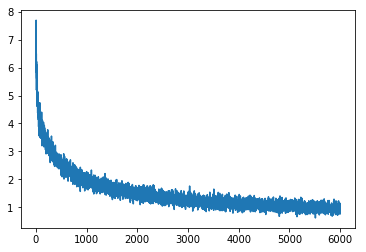

In [7]:
plt.plot(loss_history)

In [8]:
Y_pred = model.predict(X_test)

In [9]:
y_pred = np.argmax(Y_pred, axis=1)
y_test = np.argmax(Y_test, axis=1)

In [10]:
np.mean(y_pred == y_test)

0.69220000000000004

# 딥러닝 라이브러리

tensorflow + keras

In [12]:
import keras

Using TensorFlow backend.


In [13]:
from keras.models import Sequential
from keras.layers import Dense

In [14]:
model = Sequential()

model.add(Dense(50, input_shape=(784,), activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

In [16]:
from keras.losses import categorical_crossentropy

In [17]:
model.compile(loss=categorical_crossentropy, optimizer='sgd', 
              metrics=['accuracy'])

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               5100      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 45,360
Trainable params: 45,360
Non-trainable params: 0
_________________________________________________________________


In [19]:
history = model.fit(X_train, Y_train, 
                    batch_size=100, epochs=100, 
                    validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 1s 17us/step - loss: 2.3025 - acc: 0.1330 - val_loss: 2.2742 - val_acc: 0.1382
Epoch 2/100
48000/48000 [==============================] - 1s 14us/step - loss: 2.2594 - acc: 0.2048 - val_loss: 2.2434 - val_acc: 0.2838
Epoch 3/100
48000/48000 [==============================] - 1s 14us/step - loss: 2.2237 - acc: 0.3177 - val_loss: 2.2010 - val_acc: 0.3686
Epoch 4/100
48000/48000 [==============================] - 1s 14us/step - loss: 2.1735 - acc: 0.3987 - val_loss: 2.1409 - val_acc: 0.4662
Epoch 5/100
48000/48000 [==============================] - 1s 14us/step - loss: 2.1005 - acc: 0.4701 - val_loss: 2.0528 - val_acc: 0.5069
Epoch 6/100
48000/48000 [==============================] - 1s 14us/step - loss: 1.9976 - acc: 0.5127 - val_loss: 1.9338 - val_acc: 0.5868
Epoch 7/100
48000/48000 [==============================] - 1s 14us/step - loss: 1.8651 - acc: 0.5563 - val_loss: 1.7875 - 

48000/48000 [==============================] - 1s 18us/step - loss: 0.3279 - acc: 0.9068 - val_loss: 0.3120 - val_acc: 0.9105
Epoch 60/100
48000/48000 [==============================] - 1s 14us/step - loss: 0.3255 - acc: 0.9075 - val_loss: 0.3099 - val_acc: 0.9113
Epoch 61/100
48000/48000 [==============================] - 1s 14us/step - loss: 0.3231 - acc: 0.9080 - val_loss: 0.3076 - val_acc: 0.9123
Epoch 62/100
48000/48000 [==============================] - 1s 14us/step - loss: 0.3208 - acc: 0.9085 - val_loss: 0.3059 - val_acc: 0.9123
Epoch 63/100
48000/48000 [==============================] - 1s 15us/step - loss: 0.3185 - acc: 0.9094 - val_loss: 0.3037 - val_acc: 0.9140
Epoch 64/100
48000/48000 [==============================] - 1s 14us/step - loss: 0.3164 - acc: 0.9097 - val_loss: 0.3017 - val_acc: 0.9134
Epoch 65/100
48000/48000 [==============================] - 1s 14us/step - loss: 0.3142 - acc: 0.9101 - val_loss: 0.2995 - val_acc: 0.9148
Epoch 66/100
48000/48000 [==============

In [21]:
훈련결과 = pd.DataFrame(history.history)
훈련결과

,acc,loss,val_acc,val_loss
0,0.132979,2.302540,0.138167,2.274208
1,0.204771,2.259377,0.283833,2.243353
2,0.317729,2.223705,0.368583,2.200959
3,0.398708,2.173523,0.466250,2.140861
4,0.470125,2.100495,0.506917,2.052832
5,0.512708,1.997590,0.586750,1.933791
6,0.556312,1.865116,0.568333,1.787469
7,0.588750,1.713308,0.631167,1.628837
8,0.631125,1.555939,0.677000,1.468916
9,0.667583,1.405492,0.704583,1.321916


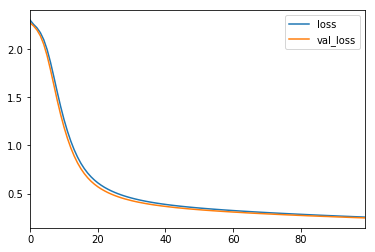

In [22]:
훈련결과[['loss', 'val_loss']].plot()

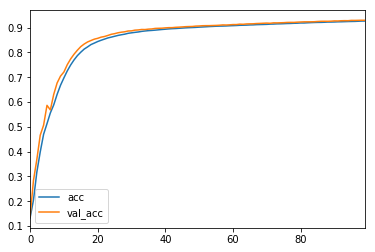

In [23]:
훈련결과[['acc', 'val_acc']].plot()

In [29]:
model = Sequential()

model.add(Dense(50, input_shape=(784,), 
                activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

In [30]:
model.compile(loss=categorical_crossentropy, optimizer='sgd', 
              metrics=['accuracy'])

In [31]:
history = model.fit(X_train, Y_train, 
                    batch_size=100, epochs=100, 
                    validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 1s 17us/step - loss: 1.1692 - acc: 0.6745 - val_loss: 0.5278 - val_acc: 0.8691
Epoch 2/100
48000/48000 [==============================] - 1s 14us/step - loss: 0.4682 - acc: 0.8739 - val_loss: 0.3795 - val_acc: 0.8937
Epoch 3/100
48000/48000 [==============================] - 1s 13us/step - loss: 0.3779 - acc: 0.8942 - val_loss: 0.3291 - val_acc: 0.9059
Epoch 4/100
48000/48000 [==============================] - 1s 14us/step - loss: 0.3365 - acc: 0.9055 - val_loss: 0.3012 - val_acc: 0.9135
Epoch 5/100
48000/48000 [==============================] - 1s 14us/step - loss: 0.3095 - acc: 0.9136 - val_loss: 0.2817 - val_acc: 0.9186
Epoch 6/100
48000/48000 [==============================] - 1s 14us/step - loss: 0.2886 - acc: 0.9185 - val_loss: 0.2654 - val_acc: 0.9240
Epoch 7/100
48000/48000 [==============================] - 1s 14us/step - loss: 0.2720 - acc: 0.9234 - val_loss: 0.2525 - 

48000/48000 [==============================] - 1s 14us/step - loss: 0.0813 - acc: 0.9774 - val_loss: 0.1131 - val_acc: 0.9673
Epoch 60/100
48000/48000 [==============================] - 1s 14us/step - loss: 0.0803 - acc: 0.9781 - val_loss: 0.1122 - val_acc: 0.9667
Epoch 61/100
48000/48000 [==============================] - 1s 14us/step - loss: 0.0793 - acc: 0.9781 - val_loss: 0.1128 - val_acc: 0.9670
Epoch 62/100
48000/48000 [==============================] - 1s 14us/step - loss: 0.0782 - acc: 0.9785 - val_loss: 0.1113 - val_acc: 0.9673
Epoch 63/100
48000/48000 [==============================] - 1s 14us/step - loss: 0.0771 - acc: 0.9786 - val_loss: 0.1108 - val_acc: 0.9674
Epoch 64/100
48000/48000 [==============================] - 1s 15us/step - loss: 0.0761 - acc: 0.9791 - val_loss: 0.1110 - val_acc: 0.9678
Epoch 65/100
48000/48000 [==============================] - 1s 14us/step - loss: 0.0750 - acc: 0.9792 - val_loss: 0.1123 - val_acc: 0.9668
Epoch 66/100
48000/48000 [==============

In [32]:
훈련결과 = pd.DataFrame(history.history)
훈련결과

,acc,loss,val_acc,val_loss
0,0.674521,1.169194,0.869083,0.527787
1,0.873938,0.468215,0.893667,0.379492
2,0.894208,0.377929,0.905917,0.329114
3,0.905542,0.336457,0.913500,0.301186
4,0.913604,0.309486,0.918583,0.281708
5,0.918500,0.288569,0.924000,0.265414
6,0.923354,0.272018,0.928917,0.252550
7,0.927729,0.257623,0.930750,0.242524
8,0.930958,0.245280,0.934500,0.231813
9,0.934500,0.234711,0.936583,0.222583


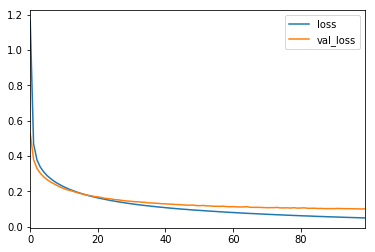

In [33]:
훈련결과[['loss', 'val_loss']].plot()

In [34]:
from sklearn.datasets import load_boston

In [36]:
boston = load_boston()
X = boston.data
y = boston.target
열제목 = boston.feature_names

In [37]:
pd.DataFrame(X, columns=열제목)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [40]:
from sklearn.preprocessing import StandardScaler

In [42]:
scaler = StandardScaler()

scaler.fit(X_train)

X_std_train = scaler.transform(X_train)
X_std_test = scaler.transform(X_test)

In [43]:
pd.DataFrame(X_std_train, columns=열제목)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.413890,2.836914,-1.363836,-0.265747,-1.219834,-0.482145,-1.732911,3.190834,-0.643265,-0.449941,1.647059,0.219588,-0.999149
1,0.111989,-0.486383,1.018645,-0.265747,0.512798,1.043419,-0.027752,-0.594081,1.637346,1.528227,0.803435,0.204682,-0.144954
2,-0.156250,-0.486383,1.236438,-0.265747,2.728154,-1.578096,0.901045,-1.065644,-0.529234,-0.038816,-1.774308,0.010782,2.191808
3,-0.421945,0.344441,-1.154872,-0.265747,-0.962094,1.025884,-1.105441,0.680499,-0.529234,-1.153025,-1.680572,0.397046,-1.136606
4,-0.419747,-0.486383,-1.282899,-0.265747,-0.573330,2.286958,-0.524056,-0.280912,-0.757295,-1.290067,-0.321399,0.401431,-1.156242
5,1.244049,-0.486383,1.018645,-0.265747,1.598926,0.285021,0.883320,-0.843328,1.637346,1.528227,0.803435,-3.600853,0.751319
6,-0.151891,-0.486383,1.236438,-0.265747,2.728154,-1.958026,0.968401,-1.097981,-0.529234,-0.038816,-1.774308,0.391347,2.361524
7,-0.411956,-0.486383,-0.171860,-0.265747,-0.064746,-0.515754,0.869140,-0.678448,-0.415204,0.133976,-0.321399,0.426860,0.493237
8,-0.410996,-0.486383,-0.171860,-0.265747,-0.064746,-0.131441,0.145954,-0.501394,-0.415204,0.133976,-0.321399,0.408775,-0.091655
9,-0.400247,-0.486383,-0.218950,-0.265747,0.262816,-0.349170,0.401196,-0.610390,-0.415204,-0.110316,0.334754,0.448234,0.229545


In [44]:
X_std_train.shape

(379, 13)

In [50]:
model = Sequential()
model.add(Dense(20, input_shape=(13,), activation='relu'))
model.add(Dense(40))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

In [51]:
history = model.fit(X_std_train, y_train, 
                    batch_size=50, epochs=10, 
                    validation_split=0.1)

Train on 341 samples, validate on 38 samples
Epoch 1/10
341/341 [==============================] - 0s 1ms/step - loss: 539.2680 - val_loss: 454.7256
Epoch 2/10
341/341 [==============================] - 0s 63us/step - loss: 515.2937 - val_loss: 431.9739
Epoch 3/10
341/341 [==============================] - 0s 21us/step - loss: 489.9463 - val_loss: 408.1008
Epoch 4/10
341/341 [==============================] - 0s 21us/step - loss: 462.2027 - val_loss: 382.7370
Epoch 5/10
341/341 [==============================] - 0s 18us/step - loss: 433.8106 - val_loss: 355.0994
Epoch 6/10
341/341 [==============================] - 0s 18us/step - loss: 402.0980 - val_loss: 325.5348
Epoch 7/10
341/341 [==============================] - 0s 18us/step - loss: 367.3405 - val_loss: 294.0869
Epoch 8/10
341/341 [==============================] - 0s 18us/step - loss: 330.4930 - val_loss: 260.9415
Epoch 9/10
341/341 [==============================] - 0s 18us/step - loss: 291.7813 - val_loss: 226.4142
Epoch 10/10

In [52]:
from sklearn.ensemble import RandomForestRegressor

In [53]:
forest = RandomForestRegressor().fit(X_train, y_train)
forest.score(X_test, y_test)

0.91513766144449937

In [54]:
from deepy.dataset import cifar10

In [55]:
(X_train, y_train), (X_test, y_test) = \
    cifar10.load('data/cifar-10-batches-py/')

In [56]:
X_train.shape

(50000, 32, 32, 3)

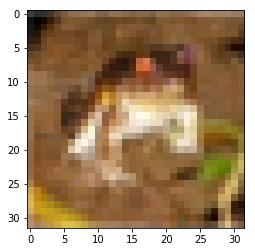

In [57]:
plt.imshow(X_train[0])

In [60]:
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

In [61]:
Y_train = pd.get_dummies(y_train).values
Y_test = pd.get_dummies(y_test).values

In [63]:
X_train = X_train.reshape(-1, 32*32*3)
X_test = X_test.reshape(-1, 32*32*3)

In [64]:
X_train.shape

(50000, 3072)

In [72]:
model = Sequential()
model.add(Dense(400, input_shape=(3072,), activation='relu'))
model.add(Dense(600, activation='relu'))
model.add(Dense(400, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss=categorical_crossentropy, 
              optimizer='adam', metrics=['acc'])

In [73]:
history = model.fit(X_train, Y_train, 
                    batch_size=100, epochs=10, 
                    validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 13s 322us/step - loss: 1.8970 - acc: 0.3067 - val_loss: 1.7790 - val_acc: 0.3569
Epoch 2/10
40000/40000 [==============================] - 12s 307us/step - loss: 1.7120 - acc: 0.3812 - val_loss: 1.6938 - val_acc: 0.4027
Epoch 3/10
40000/40000 [==============================] - 12s 308us/step - loss: 1.6295 - acc: 0.4147 - val_loss: 1.6080 - val_acc: 0.4174
Epoch 4/10
40000/40000 [==============================] - 12s 307us/step - loss: 1.5562 - acc: 0.4432 - val_loss: 1.5621 - val_acc: 0.4360
Epoch 5/10
40000/40000 [==============================] - 12s 309us/step - loss: 1.5037 - acc: 0.4575 - val_loss: 1.5700 - val_acc: 0.4420
Epoch 6/10
40000/40000 [==============================] - 12s 308us/step - loss: 1.4603 - acc: 0.4760 - val_loss: 1.5307 - val_acc: 0.4526
Epoch 7/10
40000/40000 [==============================] - 12s 310us/step - loss: 1.4176 - acc: 0.4925 - val_loss: 1.

In [74]:
훈련결과 = pd.DataFrame(history.history)

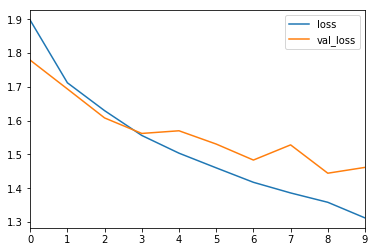

In [75]:
훈련결과[['loss', 'val_loss']].plot()

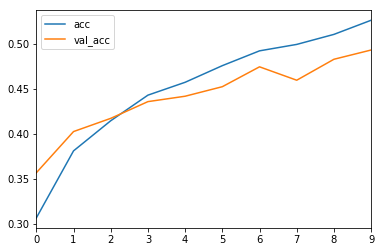

In [76]:
훈련결과[['acc', 'val_acc']].plot()

# 1997 LeNet 

... 을 시작으로 합성곱 신경망이 탄생합니다.

CNN; Convolutional Neural Network

In [83]:
(X_train, Y_train), (X_test, Y_test) = \
    mnist.load_mnist(flatten=False, normalize=True, 
                     one_hot_label=True)

In [86]:
축순서 = [0, 2, 3, 1]
X_train = X_train.transpose(축순서)
X_test = X_test.transpose(축순서)

In [87]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [78]:
from keras.layers import Conv2D
from keras.layers import MaxPooling2D, Flatten

In [88]:
model = Sequential()
# 1층
model.add(Conv2D(20, input_shape=(28, 28, 1), 
                 kernel_size=(5,5), padding='same', 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
# 2층
model.add(Conv2D(50, kernel_size=5, padding='same', 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
# 출력 준비층
model.add(Flatten())
model.add(Dense(500, activation='relu'))
# 출력
model.add(Dense(10, activation='softmax'))

model.compile(loss=categorical_crossentropy, 
              optimizer='adam', metrics=['acc'])

In [80]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 20)        1520      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 20)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 50)        25050     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 50)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_33 (Dense)             (None, 500)               1600500   
_________________________________________________________________
dense_34 (Dense)             (None, 10)                5010      
Total para

In [89]:
history = model.fit(X_train, Y_train, 
                    batch_size=128, epochs=20, 
                    validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 51s 1ms/step - loss: 0.1773 - acc: 0.9453 - val_loss: 0.0509 - val_acc: 0.9841
Epoch 2/20
48000/48000 [==============================] - 50s 1ms/step - loss: 0.0497 - acc: 0.9842 - val_loss: 0.0468 - val_acc: 0.9862
Epoch 3/20
48000/48000 [==============================] - 50s 1ms/step - loss: 0.0322 - acc: 0.9904 - val_loss: 0.0464 - val_acc: 0.9859
Epoch 4/20
48000/48000 [==============================] - 51s 1ms/step - loss: 0.0244 - acc: 0.9923 - val_loss: 0.0323 - val_acc: 0.9903
Epoch 5/20
48000/48000 [==============================] - 51s 1ms/step - loss: 0.0176 - acc: 0.9939 - val_loss: 0.0303 - val_acc: 0.9910
Epoch 6/20
48000/48000 [==============================] - 51s 1ms/step - loss: 0.0134 - acc: 0.9956 - val_loss: 0.0316 - val_acc: 0.9907
Epoch 7/20
48000/48000 [==============================] - 52s 1ms/step - loss: 0.0105 - acc: 0.9970 - val_loss: 0.0399 - val_acc